In [1]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
import pandas as pd
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import pickle

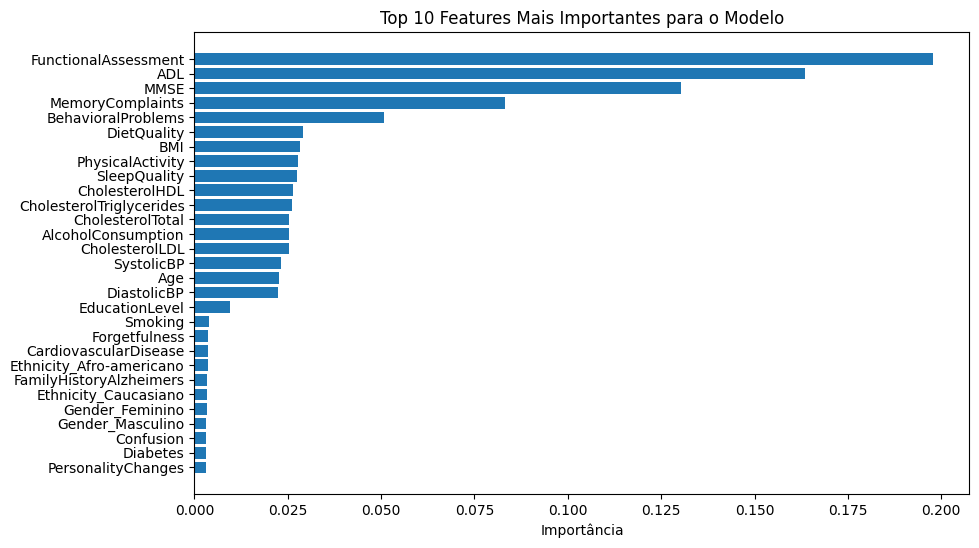

,feature,importance
21,FunctionalAssessment,0.197694
24,ADL,0.163483
20,MMSE,0.130248
22,MemoryComplaints,0.083237
23,BehavioralProblems,0.050781
6,DietQuality,0.028989
2,BMI,0.028224
5,PhysicalActivity,0.027607
7,SleepQuality,0.027571
18,CholesterolHDL,0.026323


In [ ]:
# Preparando o dataset
data = pd.read_excel("alzheirmer_data.xlsx")
df = data.copy()

# Removendo colunas não úteis para a previsão como PatientID e DoctorInCharge
df.drop(['PatientID', 'DoctorInCharge'], axis=1, inplace=True)
escolaridade_ordem = [
    "Não Possui",
    "Ensino Médio",
    "Graduação",
    "Pós-graduação"
]

X = df.iloc[:,0:32]

# Converte a coluna EducationLevel usando pd.Categorical
X['EducationLevel'] = pd.Categorical(X['EducationLevel'], categories=escolaridade_ordem, ordered=True)
X['EducationLevel'] = X['EducationLevel'].cat.codes
X = pd.get_dummies(X,columns=['Ethnicity',"Gender"], drop_first=False)
y = df.iloc[:,32]
modelo = RandomForestClassifier(n_estimators=100, random_state=0)
modelo.fit(X, y)
pickle.dump(modelo, open('ml_trained_model.sav', 'wb'))
new_model = open('ml_trained_model.sav', 'rb')

In [69]:

data = pd.read_excel("alzheirmer_data - Copia.xlsx")
df = data.copy()
X = df.iloc[:,0:14]
X = pd.get_dummies(X,columns=['Ethnicity',"Gender"], drop_first=False)
y = df.iloc[:,14]
modelo = RandomForestClassifier(n_estimators=100, random_state=0)
modelo.fit(X, y)
pickle.dump(modelo, open('ml_trained_model2.sav', 'wb'))
new_model = open('ml_trained_model2.sav', 'rb')


In [ ]:
X = df.iloc[:,0:32]

# Converte a coluna EducationLevel usando pd.Categorical
X['EducationLevel'] = pd.Categorical(X['EducationLevel'], categories=escolaridade_ordem, ordered=True)
X['EducationLevel'] = X['EducationLevel'].cat.codes
X = pd.get_dummies(X,columns=['Ethnicity',"Gender"], drop_first=False)
y = df.iloc[:,32]
modelo = RandomForestClassifier(n_estimators=100, random_state=0)
modelo.fit(X, y)
pickle.dump(modelo, open('ml_trained_model.sav', 'wb'))
new_model = open('ml_trained_model.sav', 'rb')

In [70]:
dici = {
    "Não":0,
    "Sim":1
}



In [ ]:
dici

TypeError: float() argument must be a string or a number, not 'dict'

,Age,Gender,Ethnicity,EducationLevel,BMI,Smoking,AlcoholConsumption,PhysicalActivity,DietQuality,SleepQuality,...,FunctionalAssessment,MemoryComplaints,BehavioralProblems,ADL,Confusion,Disorientation,PersonalityChanges,DifficultyCompletingTasks,Forgetfulness,Diagnosis
0,73,Masculino,Caucasiano,Graduação,22.927749,Não,13.297218,6.327112,1.347214,9.025679,...,6.518877,Não,Não,1.725883,Não,Não,Não,Sim,Não,Negativo
1,89,Masculino,Caucasiano,Não Possui,26.827681,Não,4.542524,7.619885,0.518767,7.151293,...,7.118696,Não,Não,2.592424,Não,Não,Não,Não,Sim,Negativo
2,73,Masculino,Outra,Ensino Médio,17.795882,Não,19.555085,7.844988,1.826335,9.673574,...,5.895077,Não,Não,7.119548,Não,Sim,Não,Sim,Não,Negativo
3,74,Feminino,Caucasiano,Ensino Médio,33.800817,Sim,12.209266,8.428001,7.435604,8.392554,...,8.965106,Não,Sim,6.481226,Não,Não,Não,Não,Não,Negativo
4,89,Masculino,Caucasiano,Não Possui,20.716974,Não,18.454356,6.310461,0.795498,5.597238,...,6.045039,Não,Não,0.014691,Não,Não,Sim,Sim,Não,Negativo


📋 Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.98      0.95       277
           1       0.96      0.86      0.91       153

    accuracy                           0.94       430
   macro avg       0.94      0.92      0.93       430
weighted avg       0.94      0.94      0.94       430



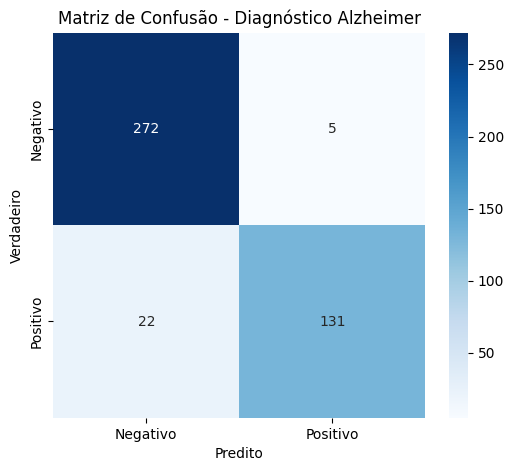

In [10]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Carregar os dados
data = pd.read_excel("alzheirmer_data.xlsx")
df = data.copy()

# Remover colunas não úteis
df.drop(['PatientID', 'DoctorInCharge'], axis=1, inplace=True)

# Codificar a coluna de escolaridade
escolaridade_ordem = [
    "Não Possui",
    "Ensino Médio",
    "Graduação",
    "Pós-graduação"
]
df['EducationLevel'] = pd.Categorical(df['EducationLevel'], categories=escolaridade_ordem, ordered=True)
df['EducationLevel'] = df['EducationLevel'].cat.codes

# One-hot encoding de variáveis categóricas
df = pd.get_dummies(df, columns=['Ethnicity', 'Gender'], drop_first=False)

# Separar X e y
X = df.drop(columns={'Diagnosis'})
y = df.iloc[:, 30]

# Dividir entre treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Treinar o modelo
modelo = RandomForestClassifier(n_estimators=100, random_state=0)
modelo.fit(X_train, y_train)

# Prever no conjunto de teste
y_pred = modelo.predict(X_test)

# Relatório de classificação
print("📋 Classification Report:")
print(classification_report(y_test, y_pred))

# Matriz de confusão
conf_matrix = confusion_matrix(y_test, y_pred)

# Plotar a matriz de confusão
plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=["Negativo", "Positivo"], yticklabels=["Negativo", "Positivo"])
plt.title("Matriz de Confusão - Diagnóstico Alzheimer")
plt.xlabel("Predito")
plt.ylabel("Verdadeiro")
plt.show()


In [ ]:
pd.DataFrame(classification_report(y_test, y_pred, output_dict=True)).transpose().round(2)


,precision,recall,f1-score,support
0,0.93,0.98,0.95,277.00
1,0.96,0.86,0.91,153.00
accuracy,0.94,0.94,0.94,0.94
macro avg,0.94,0.92,0.93,430.00
weighted avg,0.94,0.94,0.94,430.00
